In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [29]:
#Generating synthetic dataset related to Kumbh Mela
np.random.seed(42)
days = np.arange(1, 101)  #100 days of event
weekend = (days % 7 == 0).astype(int)  #Feature Is weekend
special_event = ((days % 15 == 0) | (days  % 30 == 0)).astype(int)  #Feature: special event days 
tourists = 5000 + 300 * days + 2000 * weekend + 5000 * special_event + np.random.normal(0, 3000, size=len(days)) #simulated tourist footfall
data = pd.DataFrame({'Days': days, 'Weekend': weekend, 'Special_Event' : special_event, 'Tourists' : tourists})
data.head(5)

,Days,Weekend,Special_Event,Tourists
0,1,0,0,6790.142459
1,2,0,0,5185.207096
2,3,0,0,7843.065614
3,4,0,0,10769.089569
4,5,0,0,5797.539876


In [31]:
data.tail(5)

,Days,Weekend,Special_Event,Tourists
95,96,0,0,29409.455156
96,97,0,0,34988.360831
97,98,1,0,37183.165817
98,99,0,0,34715.340370
99,100,0,0,34296.238600


In [37]:
#Splitting data into train and test sets 
X = data[['Days', 'Weekend', 'Special_Event']]
y = data['Tourists']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,Days,Weekend,Special_Event
55,56,1,0
88,89,0,0
26,27,0,0
42,43,0,0
69,70,1,0
...,...,...,...
60,61,0,0
71,72,0,0
14,15,0,1
92,93,0,0


In [39]:
# Applying polynomial features
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [41]:
#training a polynomial regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [43]:
#making predictions
y_pred = model.predict(X_test_poly)

In [45]:
y_pred

array([31948.13895139, 20606.14158901, 25916.52544551, 18153.78700791,
       21136.49866641, 16334.11389848, 11269.5733637 , 29103.25759722,
        7775.77385524,  4915.58881019, 10097.50959368, 13636.09270534,
       26867.64688443, 14531.23464025, 33999.09017408,  6054.06487781,
       29920.04602616, 28142.33974511,  8353.40881465, 13934.00685444])

In [47]:
X_test_poly

array([[1.000e+00, 8.400e+01, 1.000e+00, 0.000e+00, 7.056e+03, 8.400e+01,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00],
       [1.000e+00, 5.400e+01, 0.000e+00, 0.000e+00, 2.916e+03, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
       [1.000e+00, 7.100e+01, 0.000e+00, 0.000e+00, 5.041e+03, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
       [1.000e+00, 4.600e+01, 0.000e+00, 0.000e+00, 2.116e+03, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
       [1.000e+00, 4.500e+01, 0.000e+00, 1.000e+00, 2.025e+03, 0.000e+00,
        4.500e+01, 0.000e+00, 0.000e+00, 1.000e+00],
       [1.000e+00, 4.000e+01, 0.000e+00, 0.000e+00, 1.600e+03, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
       [1.000e+00, 2.300e+01, 0.000e+00, 0.000e+00, 5.290e+02, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
       [1.000e+00, 8.100e+01, 0.000e+00, 0.000e+00, 6.561e+03, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+

In [49]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

In [51]:
mae

1714.7546725312372

In [53]:
mse

5089324.917162231

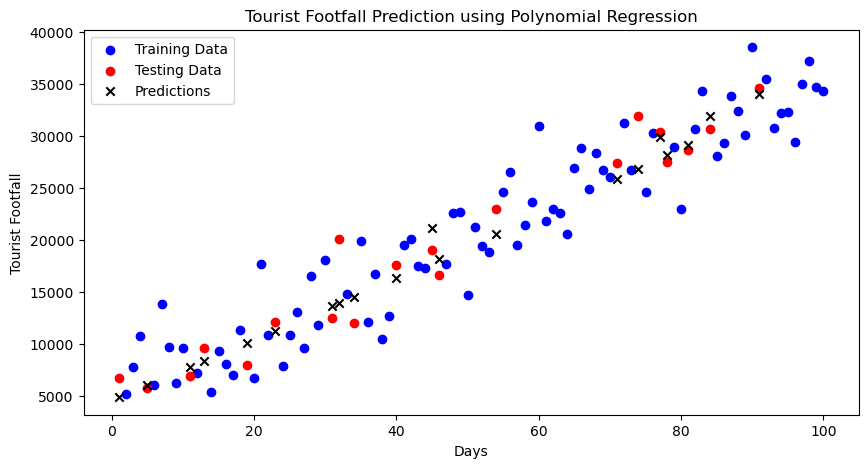

In [55]:
# Plotting results
plt.figure(figsize=(10, 5))
plt.scatter(X_train['Days'], y_train, color='blue', label='Training Data')
plt.scatter(X_test['Days'], y_test, color='red', label='Testing Data')
plt.scatter(X_test['Days'], y_pred, color='black', marker='x', label='Predictions') 
plt.xlabel('Days')
plt.ylabel('Tourist Footfall')
plt.title('Tourist Footfall Prediction using Polynomial Regression')
plt.legend()
plt.show()

In [57]:
# Display metrics
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")

Mean Absolute Error: 1714.75
Mean Squared Error: 5089324.92
